<a href="https://colab.research.google.com/github/Darshan0805/AML-Project/blob/main/2348548_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Activation function

Unit Step

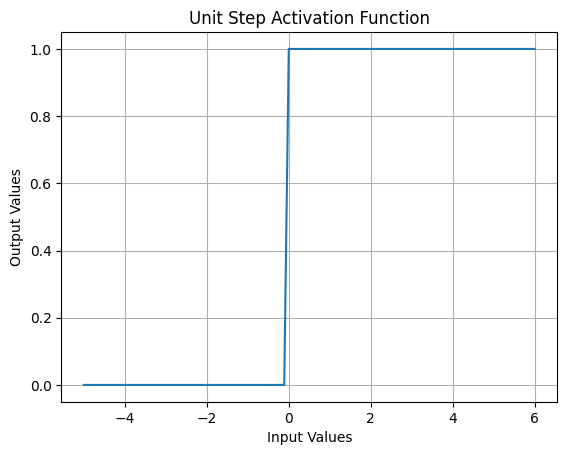

In [ ]:
ip_values = np.linspace(-5, 6, 100)

op_values = np.where(ip_values >= 0, 1, 0)

plt.plot(ip_values, op_values, label='Unit Step')
plt.title('Unit Step Activation Function')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.show()

Sign- Sigmoid

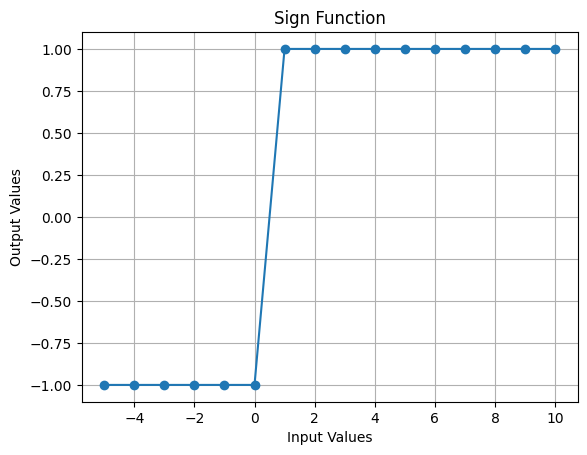

In [ ]:
x = np.arange(-5, 11)

y = np.where(x > 0, 1, -1)

plt.plot(x, y, marker='o')
plt.title('Sign Function')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.show()

Linear Function

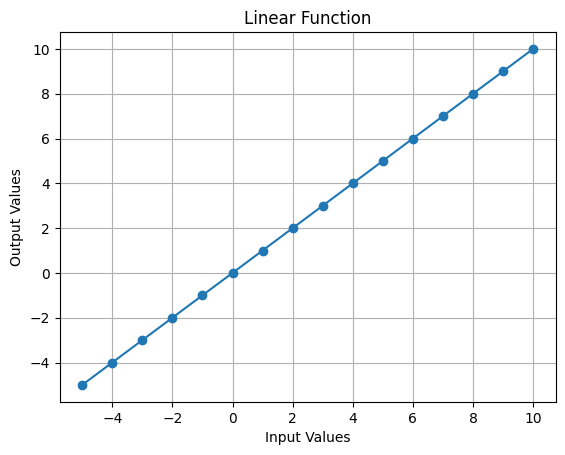

In [ ]:
x = np.arange(-5, 11)

y = x

plt.plot(x, y, marker='o')
plt.title('Linear Function')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.show()

Piece-wise Linear Function

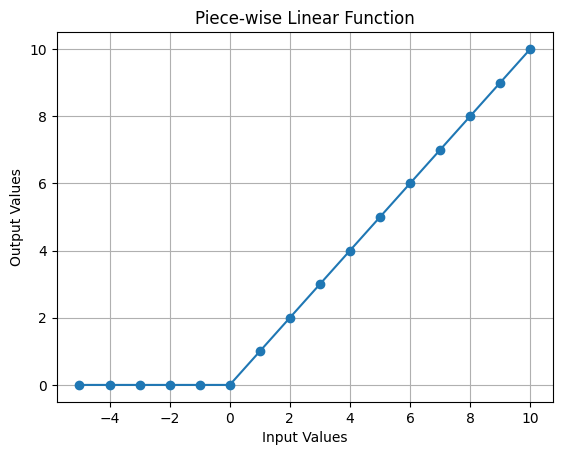

In [ ]:
x = np.arange(-5, 11)

y = np.where(x <= 0, 0, x)

plt.plot(x, y, marker='o')
plt.title('Piece-wise Linear Function')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.show()

Logistic (sigmoid) function

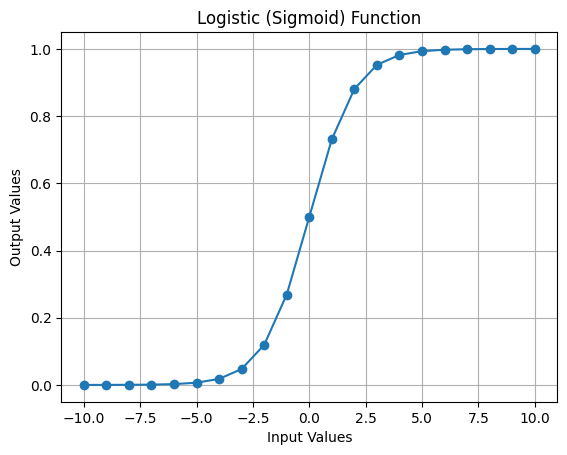

In [ ]:
x = np.arange(-10, 11)

y = 1 / (1 + np.exp(-x))

plt.plot(x, y, marker='o')
plt.title('Logistic (Sigmoid) Function')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)

Hyperbolic tangent function

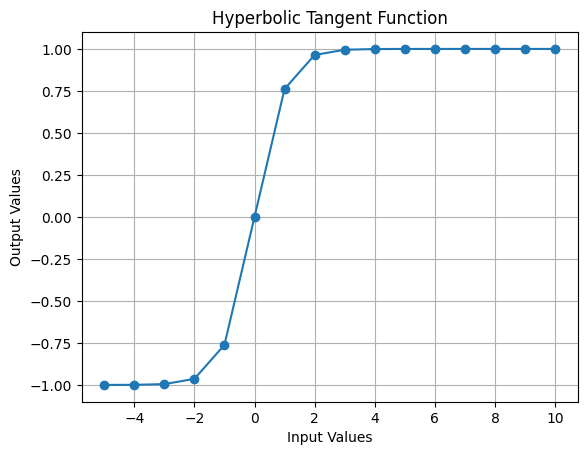

In [ ]:
x = np.arange(-5, 11)

y = np.tanh(x)

plt.plot(x, y, marker='o')
plt.title('Hyperbolic Tangent Function')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.show()

#Activation function on Iris Dataset

In [ ]:
iris = datasets.load_iris()

In [ ]:
input_values = iris.data[:, 0]

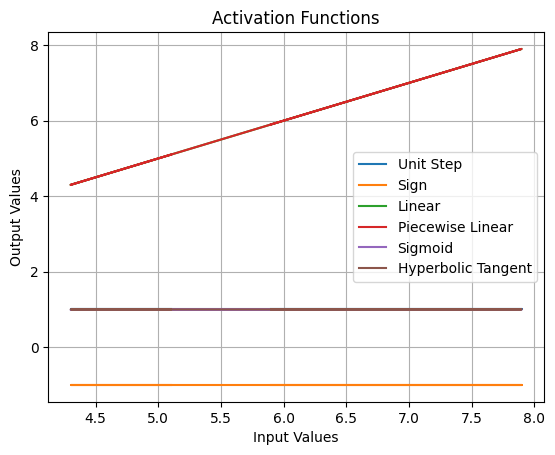

In [ ]:
for activation_function in [
    (np.where, 0, 1, "Unit Step"),
    (np.where, 0, -1, "Sign"),
    (lambda x: x, None, None, "Linear"),
    (lambda x: np.where(x <= 0, 0, x), None, None, "Piecewise Linear"),
    (lambda x: 1 / (1 + np.exp(-x)), None, None, "Sigmoid"),
    (np.tanh, None, None, "Hyperbolic Tangent"),
]:

    if isinstance(activation_function, tuple):
        if activation_function[1] is not None:
            y = activation_function[0](input_values, activation_function[2], activation_function[1])
        else:
            y = activation_function[0](input_values)
    else:
        y = activation_function(input_values)

    plt.plot(input_values, y, label=activation_function[-1])

plt.xlabel("Input Values")
plt.ylabel("Output Values")
plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()


Multi-Layer Perceptron

In [ ]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam')


In [ ]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.43333333333333335


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Perceptron

In [ ]:
import numpy as np

def perceptron(x1, x2, w1, w2, w0):
    # Calculate the weighted sum
    z = w1 * x1 + w2 * x2 + w0

    # Apply the unit step function (activation function)
    if z >= 0:
        return 1
    else:
        return 0

def compute_error(y_actual, y_expected):
    return y_expected - y_actual

def run_operation(operation, w1, w2, w0):
    errors = []

    for input_values, expected_output in operation:
        x1, x2 = input_values
        y_actual = perceptron(x1, x2, w1, w2, w0)
        error = compute_error(y_actual, expected_output)
        errors.append(error)

        print(f"{input_values} => Perceptron Output: {y_actual} | Error: {error}")

    average_error = np.mean(np.abs(errors))
    print(f"Average Error: {average_error}\n")

In [ ]:
# AND operation
and_operation = [((0, 0), 0), ((0, 1), 0), ((1, 0), 0), ((1, 1), 1)]
print("AND Operation:")
run_operation(and_operation, w1=0.5, w2=0.243, w0=0.2)

AND Operation:
(0, 0) => Perceptron Output: 1 | Error: -1
(0, 1) => Perceptron Output: 1 | Error: -1
(1, 0) => Perceptron Output: 1 | Error: -1
(1, 1) => Perceptron Output: 1 | Error: 0
Average Error: 0.75



In [ ]:
# OR operation
or_operation = [((0, 0), 0), ((0, 1), 1), ((1, 0), 1), ((1, 1), 1)]
print("OR Operation:")
run_operation(or_operation, w1=0.5, w2=0.243, w0=0.2)

OR Operation:
(0, 0) => Perceptron Output: 1 | Error: -1
(0, 1) => Perceptron Output: 1 | Error: 0
(1, 0) => Perceptron Output: 1 | Error: 0
(1, 1) => Perceptron Output: 1 | Error: 0
Average Error: 0.25



In [ ]:
# XOR operation
xor_operation = [((0, 0), 0), ((0, 1), 1), ((1, 0), 1), ((1, 1), 0)]
print("XOR Operation:")
run_operation(xor_operation, w1=0.5, w2=0.243, w0=0.2)

XOR Operation:
(0, 0) => Perceptron Output: 1 | Error: -1
(0, 1) => Perceptron Output: 1 | Error: 0
(1, 0) => Perceptron Output: 1 | Error: 0
(1, 1) => Perceptron Output: 1 | Error: -1
Average Error: 0.5

